In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load data

In [2]:
df = pd.read_csv('WHR/2019.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


# Add categories

In [3]:
add=df['Score'].max()-df['Score'].min()
grp=round(add/3,3)
cat=[]
low=df['Score'].min()+grp
mid=low+grp
for i in df.Score:
    if(i>0 and i<low):
        cat.append('Low')
        
        
    elif(i>low and i<mid):
         cat.append('Mid')
    else:
         cat.append('High')

df['Category']=cat  

In [4]:
color = (df.Category).map({'High': 'background-color: dodgerblue', 'Mid': 'background-color: orange', 'Low': 'background-color: limegreen'})
df.style.apply(lambda s: color)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Category
0,1,Finland,7.769000,1.340000,1.587000,0.986000,0.596000,0.153000,0.393000,High
1,2,Denmark,7.600000,1.383000,1.573000,0.996000,0.592000,0.252000,0.410000,High
2,3,Norway,7.554000,1.488000,1.582000,1.028000,0.603000,0.271000,0.341000,High
3,4,Iceland,7.494000,1.380000,1.624000,1.026000,0.591000,0.354000,0.118000,High
4,5,Netherlands,7.488000,1.396000,1.522000,0.999000,0.557000,0.322000,0.298000,High
5,6,Switzerland,7.480000,1.452000,1.526000,1.052000,0.572000,0.263000,0.343000,High
6,7,Sweden,7.343000,1.387000,1.487000,1.009000,0.574000,0.267000,0.373000,High
7,8,New Zealand,7.307000,1.303000,1.557000,1.026000,0.585000,0.330000,0.380000,High
8,9,Canada,7.278000,1.365000,1.505000,1.039000,0.584000,0.285000,0.308000,High
9,10,Austria,7.246000,1.376000,1.475000,1.016000,0.532000,0.244000,0.226000,High


# Plot GDP vs Score

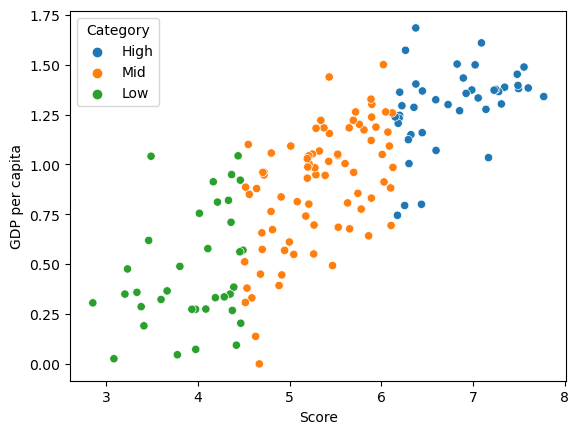

In [5]:
sns.scatterplot(data=df, x='Score', y='GDP per capita', hue='Category')
plt.show()

In [6]:
X = df[['Score', 'GDP per capita']].to_numpy()

In [7]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=3, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

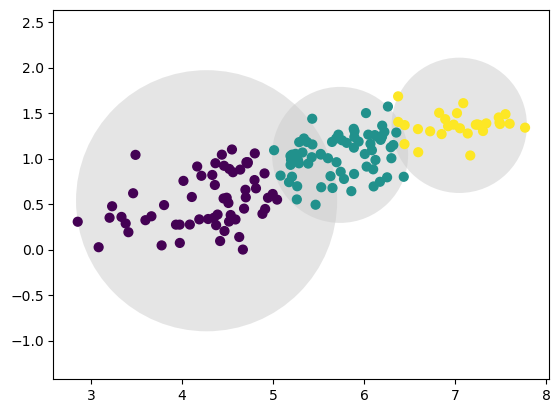

In [9]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
plot_kmeans(kmeans, X)